In [1]:
# TODO: explain how to run this, and that they only need the gist (loads tools)

# wranglign ---------
import pandas as pd
from siuba import *

# plotting ----------
from plotnine import *

theme_set(theme_classic(base_family = "Noto Sans CJK JP"))

# data --------------
#fname = "/Users/machow/Dropbox/Repo/siublocks-org/intro-tidyverse/tutorial/data/music200.csv"
fname = "https://siublocks.s3.us-east-2.amazonaws.com/course-data/music200.csv"
music_top200 = pd.read_csv(fname)

# tracks
#fname = "/Users/machow/Dropbox/Repo/siublocks-org/intro-tidyverse/tutorial/data/track_features.csv"
fname = "https://siublocks.s3.us-east-2.amazonaws.com/course-data/track_features.csv"
track_features = pd.read_csv(fname)

# student support ----------
from siuba import pipe
from IPython.display import HTML, display
from siututor import Blank
___ = Blank()

# DataFrame display --------
pd.set_option("display.max_rows", 6)

from IPython import get_ipython
# special ipython function to get the html formatter
html_formatter = get_ipython().display_formatter.formatters['text/html']

# here, we avoid the default df._repr_html_ method, since it inlines css
# (style tags make vue angry)
html_formatter.for_type(
    pd.DataFrame,
    lambda df: df.to_html(max_rows = pd.get_option("display.max_rows"), show_dimensions = True)
)



### Exercise 1: 

**TODO**

### Exercise 2:

Below is the start of plotnine's documentation for `facet_wrap`. 


<img src="../assets/facet_wrap_docs.png" style="width: 100%;">

Notice that the Parameters section lists `ncol` and `nrow` options. These determine how many columns or rows to use. For example, the plot below has `nrow = 1`.

Try out the plot as is, and with the `nrow` argument changed to `ncol = 1`.
Then, answer the questions below.

findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


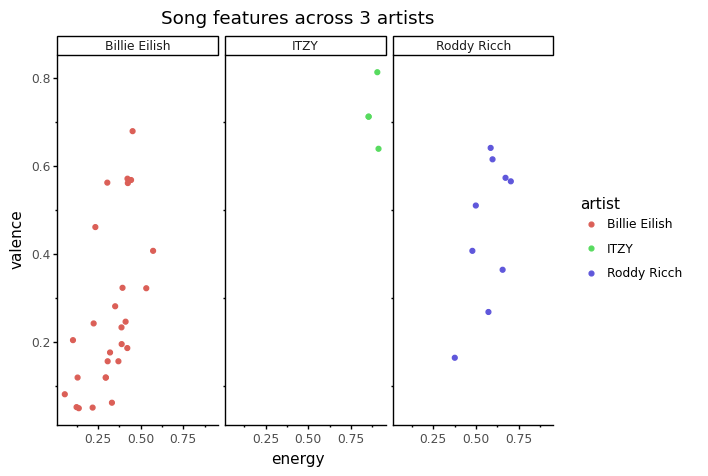

<ggplot: (-9223372036577047292)>

In [2]:
# This code keeps the 3 artists listed ----
artists_to_keep = ["Billie Eilish", "ITZY", "Roddy Ricch"]

some_artists = (
  track_features
  >> filter(_.artist.isin(artists_to_keep))
)

# This code plots the data ----
(some_artists
  >> ggplot(aes("energy", "valence", color = "artist"))
   + geom_point()
   + facet_wrap("~artist", nrow = 1)
   + labs(title = "Song features across 3 artists")
)

<prompt-expandable header="Which of the three artists tends to have the lowest valence?">

<q-multiple-choice>
  <q-opt text="Billie Eilish"><span>Correct! We'll discuss how to measure the idea of "tends to have" in the next chapter.</span></q-opt>
  <q-opt text="ITZY"><span>That's not right. This artist tends to have the highest valence.</span></q-opt>
  <q-opt text="Roddy Ricch"><span>That's not right. Look for the cluster of points toward the bottom of the plot.</span></q-opt>
</q-multiple-choice>

</prompt-expandable>


Which value seems easier to compare across facets, when ncol is set to 1?

<details>
<summary>answer</summary>
    
This is subjective, but I would say energy is easier to compare, since there is only one x-axis for across all plots. (For example, there is a only one spot on the x-axis where energy is .25).
    
</details>